# Wordcloud by topic

In [40]:
import json
import pandas as pd
import pprint as pp

In [41]:
with open('df_new.json') as json_file5:
    newdat = json.load(json_file5)
newdat = pd.DataFrame(newdat)
newdat

,snips,no_stops,speaker,is_facilitator?,length,conv_ID,start_time,index,snippet_topic_probs,overall_topic_probs
0,Welcome to this conversation of Cortico's Loca...,welcom convers cortico' local voic network new...,Yule,1.0,47.0,532.0,2.8,0.0,"{'Wellness': 0.02, 'mental health': 0.02}",NaN
1,"Following our conversation today, the video re...",follow convers today video record discard audi...,Yule,1.0,90.0,532.0,14.7,1.0,"{'Community Cohesion': 0.032258, 'community me...",NaN
2,"To this end, we're inviting you to have a diff...",end we'r invit differ type convers local voic ...,Yule,1.0,112.0,532.0,40.4,2.0,"{'Wellness': 0.025424, 'Community Cohesion': 0...",NaN
3,As a participant in this conversation you're p...,particip convers provid consent cortico oper l...,Yule,1.0,115.0,532.0,75.6,3.0,"{'Community Cohesion': 0.008403, 'Trust': 0.00...",NaN
4,I agree.,agre,Alex,0.0,1.0,532.0,108.1,4.0,{},NaN
...,...,...,...,...,...,...,...,...,...,...
drug use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000057
formerly incarcerated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000015
city agencies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000012
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003


In [42]:
action_areas = ['Housing Quality','Economic stability','Education','Built Environment','Community Cohesion','Health Care Access']
contextual_factors = ['covid-19','Racism','Poverty','Oppression','Discrimination','Justice','Fair','Safety','Inequity','Gap','Investment','Policy','programs','Trust','Inclusion','Accessibility']
populations_ident = ['Black', 'White', 'Asian', 'Latinx','POC', 'Indigenous','older adults', 'elderly','Youth', 'children', 'babies', 'teenagers','parents', 'families', 'LGBQ', 'TGNC', 'gender identity', 'sexual orientation','immigrants', 'immigration status', 'foreign-born', 'non-English speakers', 'formerly incarcerated', 'justice-system involved','Disabilities', 'able-bodied','caretaker','age','religion','city agencies','elected officials','community members','local organizations', 'community-based organization','police']
health_risk = ['obesity','asthma','smoking','drinking', 'mental health', 'drug use','diabetes','violence', 'hypertension', 'high blood pressure', 'heart disease', 'cardiac arrest', 'stroke','HIV/AIDS','birth','cancer']
other = ['Physical symptoms', 'Exercise', 'Wellness', 'Food']

## divide into sublists by topic

In [43]:
''' replicate this same code for any topic you want to evaluate'''

healthli = []
newdat = newdat[0:5766]
for i,ind in enumerate(newdat['snippet_topic_probs']):
    for d in ind:
        if d == 'Health Care Access':
            if newdat['is_facilitator?'][i] != 1.0:
                healthli.append(newdat['snips'][i])

# len(healthli)

## Top words code from Public Thought labs
Code originally contributed by Belén Saldías (MIT) and adapted by Bridgit Mendler (MIT). This code was developed as part of the MIT & UW-Madison class Understanding Public Thought in Fall 2020.

In [44]:
from nltk.stem import PorterStemmer 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(lowercase=False, tokenizer=str.split)

In [45]:
stemmer = PorterStemmer()
stopwordz = ['en','y','want','new','within','especially','know','everyone','felt','around','es','14','point','lo','whole','little','went','00','every','kind','two','first','old','day','talk','mean','maybe','live','person','whether','someone','different','able','will','saying','everybody','sure','years','much','back','look','important,','still','many','always','take','better','right','got','make','actually','well','stuff','way','good','come','okay','oh','york','see','feel','even','you','go','inaudible','say','said','things','yeah','thing','la','something','one','el','people','now','us','lot','thing','inaud','una','que','de','para','going','Local','Voices','Network','So','and','And','think','so','really','to', 'I', 'of','a','about','above','after','again','against','all','also','am','an','and','any','are','aren','t','as','at','be','because','been','before','being','below','between','both','but','by','can','can','t','cannot','com','could','couldn','t','did','didn','t','do','does','doesn','t','doing','don','t','down','during','each','else','ever','few','for','from','further','get','had','hadn','t','has','hasn','t','have','haven','t','having','he','he','d','he','ll','he','s','her','here','here','s','hers','herself','him','himself','his','how','however','how','s','http','i','i','d','i','ll','i','m','i','ve','if','in','into','is','isn','t','it','it','s','its','itself','just','k','let','s','like','me','more','most','mustn','t','my','myself','no','nor','not','of','off','on','once','only','or','other','otherwise','ought','our','ours','ourselves','out','over','own','r','same','shall','shan','t','she','she','d','she','ll','she','s','should','shouldn','t','since','so','some','such','than','that','that','s','the','their','theirs','them','themselves','then','there','there','s','these','they','they','d','they','ll','they','re','they','ve','this','those','through','to','too','under','until','up','very','was','wasn','t','we','we','d','we','ll','we','re','we','ve','were','weren','t','what','what','s','when','when','s','where','where','s','which','while','who','who','s','whom','why','why','s','with','won','t','would','wouldn','t','www','you','you','d','you','ll','you','re','you','ve','your','yours','yourself','yourselves']
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_counter = StemmedCountVectorizer(lowercase=True, tokenizer=None, stop_words=stopwordz)

In [47]:
"""
They can also get this in one step by importing and using 
`TfidfVectorizer` from sklearn.feature_extraction.text
"""

from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

def get_documents_embedding(documents, stemmed=False, smooth_idf=False,
                            norm=None, lowercase=True, stop_words=stopwordz,
                            as_df=False, index=None):
    
    # We select and define what counter we'll be using
    params = dict(lowercase=lowercase, stop_words=stop_words)
#     if stemmed:
#         counter = StemmedCountVectorizer(**params)
# #         counter = (**params)
#     else:
    counter = CountVectorizer(**params)
#         counter = (**params)

    # We get a bag of words (BoW) for the given documents
    # this helps calculate 1. TF
    BoW = counter.fit_transform(documents).toarray()
    terms_pdoc = BoW.sum(1, keepdims=True)
    
    # We define the paramenters and tfidf transformer we'll use
    params = dict(norm=norm, smooth_idf=smooth_idf)
    transformer = TfidfTransformer(**params)

    # We transform our BoW into TF-IDF vectors
    tf_idf = transformer.fit_transform(BoW).toarray()

    # This is the denominator of the TF stage, if we use
    # norm='l2' this operation is reduntant.
    if norm is None:
        tf_idf = tf_idf / terms_pdoc

    if as_df:
        feature_names = counter.get_feature_names()
        documents_embeddings = pd.DataFrame(tf_idf, columns=feature_names, index=index)
        return documents_embeddings

    return tf_idf

In [48]:
'''Change healthli to whichever list you want to evaluate'''
stemmed_counter_wstopw = StemmedCountVectorizer(lowercase=True, tokenizer=None, stop_words=None)

def get_stats(BoW, title):
    print(f"## {title}")
    print("Number of snippets = {}".format(BoW.shape[0]))
    print("Vocabulary size -- distinct terms used accross the dataset = {}".format(BoW.shape[1]))
    print("Total terms = {}".format(BoW.sum(1).sum(0)))
    print("Average number of terms per turn/snippet = {}\n".format(BoW.sum(1).mean()))

# LVN Snippets
lvn_turns_BoW =  stemmed_counter_wstopw.fit_transform(healthli) 
lvn_turns_BoW_terms = stemmed_counter_wstopw.get_feature_names()
get_stats(lvn_turns_BoW, 'LVN data')

## LVN data
Number of snippets = 520
Vocabulary size -- distinct terms used accross the dataset = 3217
Total terms = [[56996]]
Average number of terms per turn/snippet = 109.6076923076923



In [49]:
'''Change healthli to whichever list you want to evaluate'''
lvn_convs_BoW = stemmed_counter_wstopw.fit_transform(healthli).toarray() 
lvn_convs_BoW_terms = stemmed_counter_wstopw.get_feature_names() # words
lvn_convs_stemmed_BoW_df = pd.DataFrame(lvn_convs_BoW, columns=lvn_convs_BoW_terms)
display(lvn_convs_stemmed_BoW_df)

,00,000,01,02,03,04,05,06,09,10,...,youth,youtub,yulia,zero,zil,zip,zocdoc,zone,zoom,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# LVN Snippets
# we remove stopwords
stemmed_counter_woutstopw = StemmedCountVectorizer(lowercase=True, tokenizer=None, stop_words=stopwordz)
lvn_turns_BoW_wosw = stemmed_counter_woutstopw.fit_transform(healthli).toarray()
lvn_turns_BoW_wosw_terms = stemmed_counter_woutstopw.get_feature_names()

lvn_turns_tfidf = get_documents_embedding(healthli, stemmed=True, smooth_idf=True, norm='l2', as_df=True)

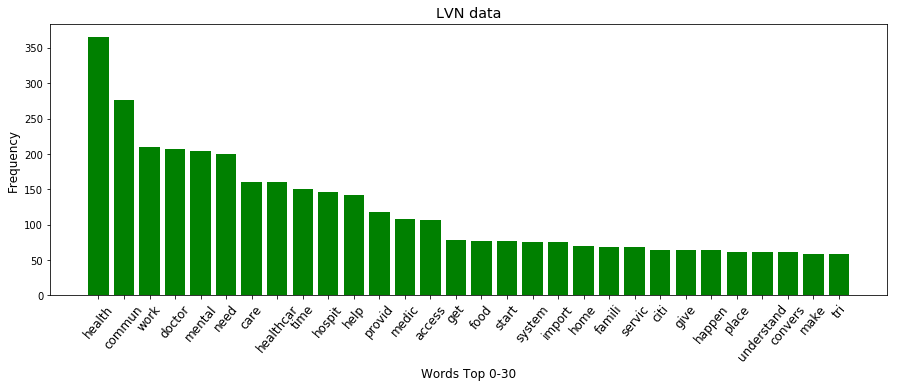

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

def plot_words_histogram(BoW, BoW_terms, init=0, end=-1, title=None):
    data_df = pd.DataFrame(BoW, columns=BoW_terms).sum(0).sort_values(ascending=False)
    top_plot = data_df[init:end]
    plt.bar(top_plot.index, top_plot.values, color='g')
    plt.xticks(rotation=50, size='large')
    plt.title(f'{title}', size='x-large')
    plt.xlabel(f'Words Top {init}-{end}', size='large')
    plt.ylabel('Frequency', size='large')
    plt.show()
    print("\n\n\n")

# LVN Snippets (removing stop-words)
plot_words_histogram(lvn_turns_BoW_wosw, lvn_turns_BoW_wosw_terms, 0, 30, 'LVN data')

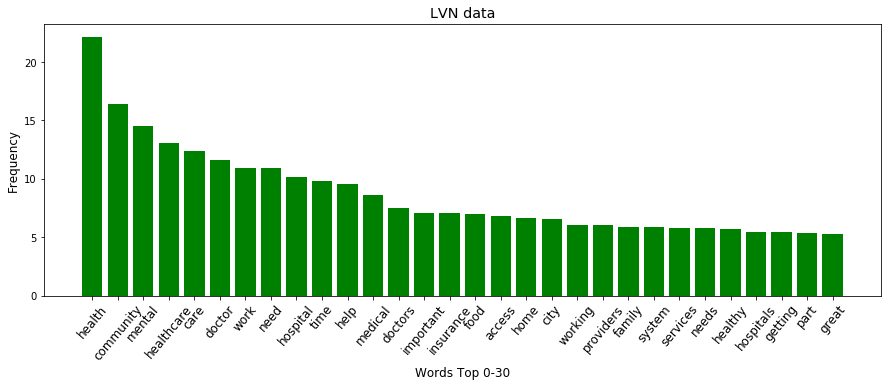

In [53]:
# LVN Snippets (removing stop-words)
plot_words_histogram(lvn_turns_tfidf, lvn_turns_tfidf.columns, 0, 30, 'LVN data')

## Top Words approach #2

Generates top words and top two-word and three-word pairs

In [94]:
def makelists(name):
    set_one = []
    set_two = []
    set_three= []
    stopwords2 = ['But','en','y','want','new','know','much','right','oh','york','see','feel','even','you','go','inaudible','say','said','things','yeah','thing','la','something','one','el','people','now','us','lot','thing','inaud','una','que','de','para','going','Local','Voices','Network','So','and','And','think','so','really','to', 'I', 'of','a','about','above','after','again','against','all','also','am','an','and','any','are','aren','t','as','at','be','because','been','before','being','below','between','both','but','by','can','can','t','cannot','com','could','couldn','t','did','didn','t','do','does','doesn','t','doing','don','t','down','during','each','else','ever','few','for','from','further','get','had','hadn','t','has','hasn','t','have','haven','t','having','he','he','d','he','ll','he','s','her','here','here','s','hers','herself','him','himself','his','how','however','how','s','http','i','i','d','i','ll','i','m','i','ve','if','in','into','is','isn','t','it','it','s','its','itself','just','k','let','s','like','me','more','most','mustn','t','my','myself','no','nor','not','of','off','on','once','only','or','other','otherwise','ought','our','ours','ourselves','out','over','own','r','same','shall','shan','t','she','she','d','she','ll','she','s','should','shouldn','t','since','so','some','such','than','that','that','s','the','their','theirs','them','themselves','then','there','there','s','these','they','they','d','they','ll','they','re','they','ve','this','those','through','to','too','under','until','up','very','was','wasn','t','we','we','d','we','ll','we','re','we','ve','were','weren','t','what','what','s','when','when','s','where','where','s','which','while','who','who','s','whom','why','why','s','with','won','t','would','wouldn','t','www','you','you','d','you','ll','you','re','you','ve','your','yours','yourself','yourselves']
    
    for i in name:
        wordli = (i.split(' '))
        for ind,y in enumerate(wordli):
            if y not in stopwords2:
                set_one.append(y)
            if ind > 0:
                set_two.append(wordli[ind-1]+'_'+wordli[ind])
            if ind > 1:
                set_three.append(wordli[ind-2]+'_'+wordli[ind-1]+'_'+wordli[ind])
    print('set_one, set_two, set_three done')
    
    wordic={}
    wordic2={}
    wordic3 = {}
    for i in set_one:
        if i in (list(wordic.keys())):
            wordic[i] += 1
        else:
            wordic[i] = 1

    for i in set_two:
        if i in (list(wordic2.keys())):
            wordic2[i] += 1
        else:
            wordic2[i] = 1

    for i in set_three:
        if i in (list(wordic3.keys())):
            wordic3[i] += 1
        else:
            wordic3[i] = 1

            
    wordicS = {}
    wordic2S = {}
    wordic3S = {}
    for i in wordic.items():
        if (i[1]) > 15:
            wordicS[i[0]] = i[1]
    for i in wordic2.items():
        wordic2S[i[0]] = i[1]
    print('length of two word pair list', len(wordic2S))
    for i in wordic3.items():
        wordic3S[i[0]] = i[1]
    print('length of three word pair list', len(wordic3S))
        
    dictFin = {}
    dictFinP = {}
    dictFinT = {}

    for var in wordicS:
        sortedv = {k: v for k, v in sorted(wordicS.items(), key=lambda item: item[1], reverse=True)}
        dictFin = sortedv
    print('sorted dictFin')
    for var in wordic2S:
        sortedv = {k: v for k, v in sorted(wordic2S.items(), key=lambda item: item[1], reverse=True)}
        dictFinP = sortedv
    print('sorted dictFinP')
    for var in wordic3S:
        sortedv = {k: v for k, v in sorted(wordic3S.items(), key=lambda item: item[1], reverse=True)}
        dictFinT = sortedv
    print('sorted dictFinT')

    return(dictFin,dictFinP,dictFinT)

In [95]:
''' This will take a while to run'''

word1, word2, word3 = makelists(healthli)

set_one, set_two, set_three done
length of two word pair list 31684
length of three word pair list 50606
sorted dictFin
sorted dictFinP
sorted dictFinT


In [107]:
word3

{'a_lot_of': 122,
 'I_feel_like': 76,
 'I_think_that': 46,
 'be_able_to': 41,
 'go_to_the': 39,
 'And_I_think': 37,
 'to_go_to': 35,
 "I'm_going_to": 35,
 'going_to_get': 32,
 'as_far_as': 30,
 'one_of_the': 28,
 "I_don't_know": 26,
 'I_have_to': 26,
 'going_to_be': 26,
 "I_think_it's": 26,
 'I_want_to': 26,
 'I_would_say': 25,
 'I_go_to': 24,
 'to_get_the': 24,
 'and_I_think': 22,
 'New_York_City': 21,
 'to_be_able': 20,
 'I_had_a': 20,
 'when_I_was': 20,
 'mental_health_and': 19,
 'So_I_think': 19,
 "I_think_that's": 19,
 "don't_want_to": 19,
 'when_it_comes': 19,
 'it_comes_to': 19,
 "you're_going_to": 19,
 'you_have_to': 19,
 'being_able_to': 18,
 'have_to_be': 18,
 'a_little_bit': 17,
 'have_access_to': 17,
 'not_going_to': 17,
 'in_terms_of': 16,
 'have_to_go': 16,
 'I_felt_like': 16,
 "we_don't_have": 16,
 "whether_it's_accessibility": 16,
 "it's_accessibility_to": 16,
 'the_way_that': 15,
 'to_have_a': 15,
 'take_care_of': 15,
 'part_of_the': 15,
 'we_have_to': 15,
 'make_sure_

In [108]:
word2

{'I_think': 279,
 'I_was': 195,
 'and_I': 193,
 'going_to': 190,
 'in_the': 187,
 'a_lot': 163,
 'to_be': 152,
 'that_I': 143,
 'to_the': 140,
 'lot_of': 133,
 'have_to': 130,
 'And_I': 128,
 'of_the': 117,
 "I_don't": 108,
 'I_feel': 106,
 'want_to': 105,
 'to_get': 103,
 'go_to': 102,
 'because_I': 101,
 'mental_health': 99,
 'that_we': 99,
 'feel_like': 97,
 'to_go': 96,
 'I_have': 94,
 'able_to': 92,
 'in_a': 92,
 'So_I': 91,
 'I_would': 81,
 'have_a': 79,
 'I_had': 75,
 'when_I': 74,
 'the_same': 73,
 'kind_of': 67,
 'in_my': 66,
 'we_have': 64,
 'it_was': 63,
 'I_can': 60,
 "don't_have": 60,
 'that_they': 60,
 'I_just': 59,
 'to_have': 59,
 'but_I': 59,
 'think_that': 58,
 'that_you': 57,
 'all_the': 56,
 'and_the': 56,
 'New_York': 56,
 'you_have': 56,
 'need_to': 56,
 'as_a': 55,
 'if_you': 55,
 'with_the': 54,
 'to_do': 53,
 'that_was': 52,
 'But_I': 51,
 'things_that': 50,
 'to_a': 49,
 'health_and': 48,
 'of_my': 48,
 'access_to': 48,
 'And_so': 46,
 'this_is': 46,
 'on_the'

In [109]:
word1

{"I'm": 355,
 "it's": 301,
 "don't": 258,
 'health': 231,
 "that's": 197,
 'mental': 186,
 'like,': 129,
 'community': 126,
 "I've": 122,
 'care': 120,
 'healthcare': 114,
 "you're": 113,
 'need': 108,
 "there's": 106,
 'able': 94,
 'work': 94,
 "we're": 91,
 'that.': 88,
 "they're": 88,
 'help': 87,
 'will': 85,
 'that,': 84,
 'always': 81,
 'way': 80,
 'New': 77,
 "can't": 77,
 'time': 76,
 "It's": 76,
 'take': 75,
 'make': 74,
 '[inaudible]': 74,
 "didn't": 73,
 'actually': 72,
 'kind': 70,
 'back': 69,
 'medical': 69,
 'felt': 68,
 'got': 64,
 'doctor': 64,
 'good': 63,
 'health.': 63,
 'it.': 63,
 'health,': 62,
 'different': 61,
 'It': 60,
 'community,': 59,
 'me,': 59,
 'whether': 57,
 'come': 57,
 'said,': 56,
 'many': 56,
 'York': 56,
 'access': 55,
 'getting': 54,
 'sure': 53,
 'important': 52,
 'part': 52,
 'hospital': 52,
 'We': 52,
 'talk': 51,
 'little': 51,
 'live': 51,
 'They': 51,
 'still': 51,
 'You': 50,
 'working': 50,
 'around': 49,
 'someone': 49,
 'The': 49,
 'fi

# Review Topic Terms

It can be good to manually review the terms and iterate through to identify words that are not a good match for the topic. If they are not a good match, will need to run the topic indexing code again and create new topic labels

In [54]:
with open('longer_topics.json') as json_file4:
    topdat = json.load(json_file4)

In [55]:
''' replicate this same code for any topic you want to evaluate'''
health_terms= []
for p in range(0,len(topdat['topics']['Health Care Access'])):
    health_terms.append(topdat['topics']['Health Care Access'][p]['term'])

### Create dictionaries of terms to count usage

In [56]:
''' replicate this same code for any topic you want to evaluate'''
health_dict = {}
for i in health_terms:
    health_dict[i] = 0

### Add snippet terms to dictionaries

In [57]:
'''replicate this same code for any topic you want to evaluate'''
for i in healthli:
    wordli = (i.split(' '))
    for ind,word in enumerate(wordli):
        if (word) in health_terms:
            health_dict[word] += 1
            worange = len(wordli)
        elif (wordli[ind-1]+"_"+wordli[ind]) in health_terms:
            health_dict[wordli[ind-1]+"_"+wordli[ind]] += 1

### Sort dictionaries to see top-used terms

In [64]:
'''replicate this same code for any topic you want to evaluate'''
dictFinHealth = {}

for var in health_dict:
    sortedv = {k: v for k, v in sorted(health_dict.items(), key=lambda item: item[1], reverse=True)}
    dictFinHealth = sortedv
# dictFinHealth

### Check topic word usage

In [66]:
'''see which words are being used to classify the snippet as related to the topic'''
for i in healthli:
    wordli = (i.split(' '))
    for ind,word in enumerate(wordli):
        if (word.lower()) in health_terms:
            print(word+'\n'+i+'\n')
            

hospitals
Yeah, when I read that question in your prompt, I was thinking about how huge, obviously... That is such a huge topic, and as everyone has a life-long relationship to their health and others' health, I mean, I was a caretaker through my 20s and I've spent a lot of time hospitals and alternative care clinics, so have a lot of experience, not as a sick person, but in relation to sickness, and also mental illness, in which I've taken care of people also, so, I don't know, I think right now... My wellbeing is kind of situated relationally because I care for people, so a lot of times it's just navigating the boundaries between taking on other people's pain and knowing how to negotiate my limits within that.

healthcare
Yeah, I just want to echo so much of what you both shared around how our desire to connect with people has just been so underscored during this time and has happened on Zoom and happened, in my neighborhood, on rooftops and you all probably... I don't know if you le